In [11]:
#Import Libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
#Import Data
dataset_train = pd.read_csv(r'C:\Users\mannami\Desktop\Python\DL Class\RNN\Google_Stock_Price_Train.csv')

In [3]:
#Training Set
training_set = dataset_train.iloc[:,1:2].values #makes np array

In [5]:
#Feature Scaling
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
#Create data structure with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
#Initialize the RNN
regressor = Sequential()

In [13]:
# Add first LSTM layer and Dropout
regressor.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

In [14]:
# Add second LSTM layer and Dropout
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [15]:
# Add third LSTM layer and Dropout
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [16]:
# Add fourth LSTM layer and Dropout
regressor.add(LSTM(units = 50, return_sequences=False))
regressor.add(Dropout(rate=0.2))

In [17]:
#Output layer
regressor.add(Dense(units=1))

In [18]:
#Compile
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
#Train
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0361
Epoch 2/100
38/38 [==============================] - 2s 49ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0066
Epoch 4/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0057: 0s - 
Epoch 5/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0054
Epoch 9/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0040
Epoch 10/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0054: 1s - loss - ETA: 0s - loss: 0
Epoch 12/100
38/38 [==============================] - 2s 44ms/step - 

38/38 [==============================] - 2s 45ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0016


In [20]:
#Real prices Jan 2017
dataset_test = pd.read_csv(r'C:\Users\mannami\Desktop\Python\DL Class\RNN\Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [21]:
#Predicted Values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [22]:
#Predicted Values
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

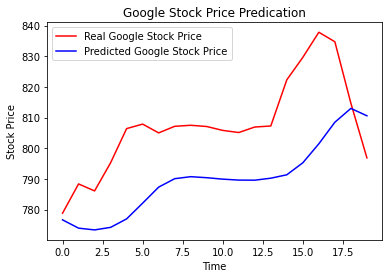

In [24]:
#Visualize results
plt.plot(real_stock_price, color='red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Predication')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()